Bài tập tuần 4

K-Means

Ví dụ 1: Phân cụm cơ bản (2D)

--- Ví dụ 1: K-Means phân cụm 4 nhóm ---


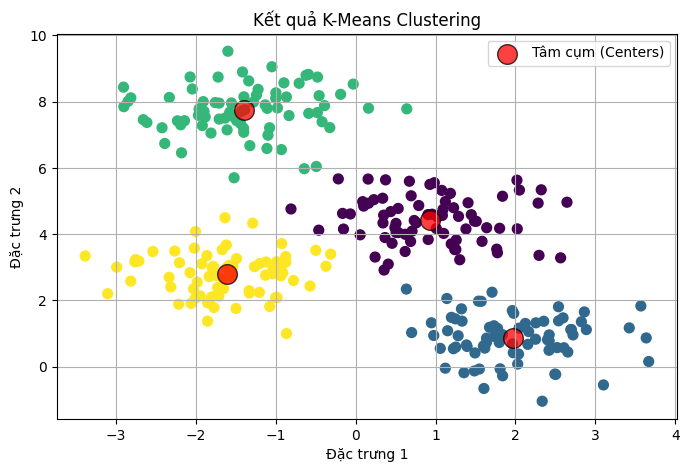

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

def kmeans_example_1():
    print("--- Ví dụ 1: K-Means phân cụm 4 nhóm ---")

    # 1. Tạo dữ liệu giả
    # X là tọa độ (300 điểm), y_true là nhãn thật (4 cụm)
    X, y_true = make_blobs(n_samples=300, centers=4,
                           cluster_std=0.70, random_state=0)

    # 2. Tạo và huấn luyện mô hình K-Means
    # n_init=10 để tránh lỗi hội tụ và chạy ổn định
    kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
    kmeans.fit(X)

    # 3. Lấy kết quả dự đoán (nhãn cụm) và tâm cụm
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_

    # 4. Trực quan hóa kết quả
    plt.figure(figsize=(8, 5))

    # Vẽ các điểm dữ liệu, tô màu theo nhãn K-Means dự đoán
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

    # Vẽ các tâm cụm (màu đỏ, to, có viền đen)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75,
                edgecolors='black', label='Tâm cụm (Centers)')

    plt.title('Kết quả K-Means Clustering')
    plt.xlabel('Đặc trưng 1')
    plt.ylabel('Đặc trưng 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Gọi hàm để chạy
kmeans_example_1()

Ví dụ 2: Phương pháp "Khuỷu tay" (Elbow Method) để chọn K

--- Ví dụ 2: K-Means (Elbow Method) ---


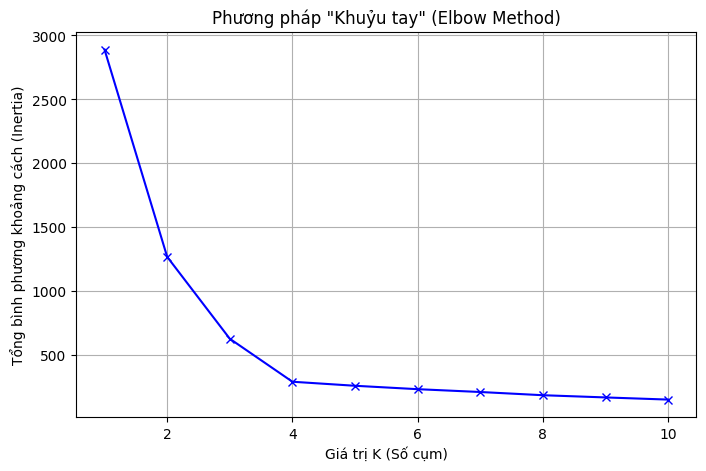

Quan sát: Biểu đồ gãy khúc rõ rệt tại K=4, đó là 'khuỷu tay' (elbow).
Đây là gợi ý K=4 là số cụm tối ưu.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

def kmeans_example_2_elbow():
    print("--- Ví dụ 2: K-Means (Elbow Method) ---")

    # 1. Tạo dữ liệu (giống ví dụ 1)
    X, y_true = make_blobs(n_samples=300, centers=4,
                           cluster_std=0.70, random_state=0)

    # 2. Chạy K-Means với nhiều giá trị K (từ 1 đến 10)
    distortions = [] # Lưu trữ tổng bình phương khoảng cách (inertia)
    K_range = range(1, 11)

    for k in K_range:
        kmeans_model = KMeans(n_clusters=k, random_state=0, n_init=10)
        kmeans_model.fit(X)
        distortions.append(kmeans_model.inertia_) # inertia_ là tổng khoảng cách

    # 3. Trực quan hóa kết quả
    plt.figure(figsize=(8, 5))
    plt.plot(K_range, distortions, 'bx-') # 'bx-' = blue, x-marker, solid line
    plt.xlabel('Giá trị K (Số cụm)')
    plt.ylabel('Tổng bình phương khoảng cách (Inertia)')
    plt.title('Phương pháp "Khuỷu tay" (Elbow Method)')
    plt.grid(True)
    plt.show()

    print("Quan sát: Biểu đồ gãy khúc rõ rệt tại K=4, đó là 'khuỷu tay' (elbow).")
    print("Đây là gợi ý K=4 là số cụm tối ưu.")

# Gọi hàm để chạy
kmeans_example_2_elbow()


KNN (K-Nearest Neighbors)

Ví dụ 1: KNN Phân loại (Classification)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

def knn_example_1_classification():
    print("--- Ví dụ 1: KNN Phân loại (Dataset Iris) ---")

    # 1. Tải và chuẩn bị dữ liệu
    iris = load_iris()
    X = iris.data
    y = iris.target

    # 2. Chia dữ liệu: 80% huấn luyện, 20% kiểm thử
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 3. Chuẩn hóa dữ liệu (QUAN TRỌNG với KNN vì nó dựa trên khoảng cách)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 4. Xây dựng và huấn luyện mô hình (chọn K=5)
    knn_classifier = KNeighborsClassifier(n_neighbors=5)
    knn_classifier.fit(X_train_scaled, y_train)

    # 5. Dự đoán trên tập kiểm thử
    y_pred = knn_classifier.predict(X_test_scaled)

    # 6. Đánh giá
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Tập dữ liệu kiểm thử có {len(y_test)} điểm.")
    print(f"Nhãn thật: {y_test}")
    print(f"Nhãn dự đoán: {y_pred}")
    print(f"==> Độ chính xác (Accuracy): {accuracy * 100:.2f}%")

# Gọi hàm để chạy
knn_example_1_classification()

--- Ví dụ 1: KNN Phân loại (Dataset Iris) ---
Tập dữ liệu kiểm thử có 30 điểm.
Nhãn thật: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Nhãn dự đoán: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
==> Độ chính xác (Accuracy): 100.00%


Ví dụ 2: KNN Hồi quy (Regression)

--- Ví dụ 2: KNN Hồi quy (Dự đoán hàm sin) ---


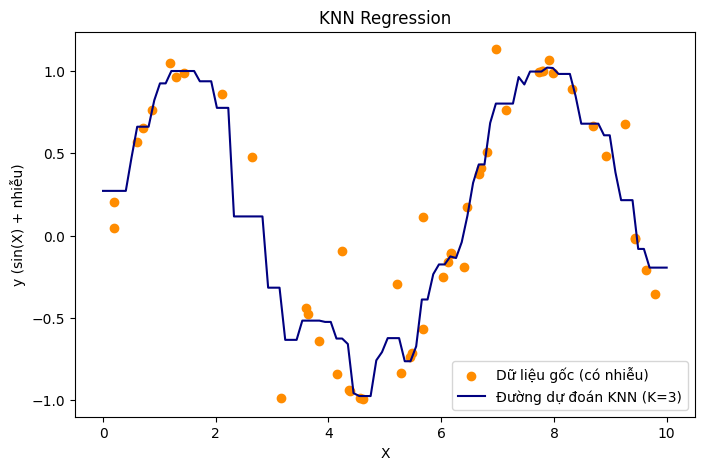

Giải thích: Đường dự đoán (màu xanh) là trung bình cộng của 3 hàng xóm gần nhất.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

def knn_example_2_regression():
    print("--- Ví dụ 2: KNN Hồi quy (Dự đoán hàm sin) ---")

    # 1. Tạo dữ liệu giả
    np.random.seed(0)
    X = np.sort(10 * np.random.rand(50, 1), axis=0) # Dữ liệu X
    y = np.sin(X).ravel() # Dữ liệu y (hàm sin)

    # Thêm nhiễu (noise) vào 10 điểm dữ liệu
    y[::5] += 2 * (0.5 - np.random.rand(10))

    # 2. Tạo và huấn luyện mô hình (K=3)
    knn_regressor = KNeighborsRegressor(n_neighbors=3)
    knn_regressor.fit(X, y)

    # 3. Tạo 100 điểm để vẽ đường dự đoán
    T = np.linspace(0, 10, 100)[:, np.newaxis]
    y_pred = knn_regressor.predict(T)

    # 4. Trực quan hóa
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, color='darkorange', label='Dữ liệu gốc (có nhiễu)')
    plt.plot(T, y_pred, color='navy', label='Đường dự đoán KNN (K=3)')
    plt.title('KNN Regression')
    plt.xlabel('X')
    plt.ylabel('y (sin(X) + nhiễu)')
    plt.legend()
    plt.show()
    print("Giải thích: Đường dự đoán (màu xanh) là trung bình cộng của 3 hàng xóm gần nhất.")

# Gọi hàm để chạy
knn_example_2_regression()


SVM (Support Vector Machine)

Ví dụ 1: SVM Tuyến tính (Linear SVM)

--- Ví dụ 1: SVM Phân loại Tuyến tính (Linear Kernel) ---


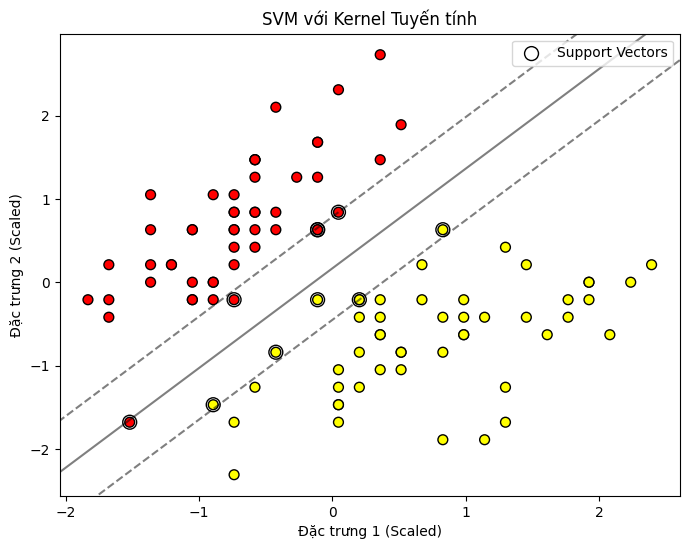

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

def svm_example_1_linear():
    print("--- Ví dụ 1: SVM Phân loại Tuyến tính (Linear Kernel) ---")

    # 1. Tải dữ liệu, chỉ lấy 2 đặc trưng đầu tiên và 2 lớp đầu tiên
    iris = load_iris()
    X = iris.data[:100, :2] # Chỉ lấy 2 đặc trưng 0 và 1
    y = iris.target[:100] # Chỉ lấy 2 lớp 0 và 1

    # 2. Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 3. Xây dựng mô hình SVM với kernel='linear'
    # C=1.0 là tham số điều chỉnh độ "mềm" của lề
    svm_linear = SVC(kernel='linear', C=1.0, random_state=0)
    svm_linear.fit(X_scaled, y)

    # 4. Trực quan hóa đường ranh giới
    plt.figure(figsize=(8, 6))

    # Vẽ các điểm dữ liệu
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=50, cmap='autumn', edgecolors='k')

    # Tạo lưới để vẽ đường ranh giới
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))

    Z = svm_linear.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Vẽ đường ranh giới và lề (margins)
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # Đánh dấu các support vectors
    ax.scatter(svm_linear.support_vectors_[:, 0], svm_linear.support_vectors_[:, 1],
               s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

    plt.title('SVM với Kernel Tuyến tính')
    plt.xlabel('Đặc trưng 1 (Scaled)')
    plt.ylabel('Đặc trưng 2 (Scaled)')
    plt.legend()
    plt.show()

# Gọi hàm để chạy
svm_example_1_linear()

Ví dụ 2: SVM Phi tuyến (Kernel 'RBF')

--- Ví dụ 2: SVM Phân loại Phi tuyến (Kernel RBF) trên bộ Digits ---
==> Độ chính xác (Accuracy): 98.22%

Báo cáo chi tiết (Classification Report):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        37
           2       0.97      1.00      0.99        38
           3       1.00      0.96      0.98        46
           4       0.98      1.00      0.99        55
           5       0.97      1.00      0.98        59
           6       0.98      1.00      0.99        45
           7       1.00      0.95      0.97        41
           8       0.95      0.97      0.96        38
           9       0.98      0.94      0.96        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



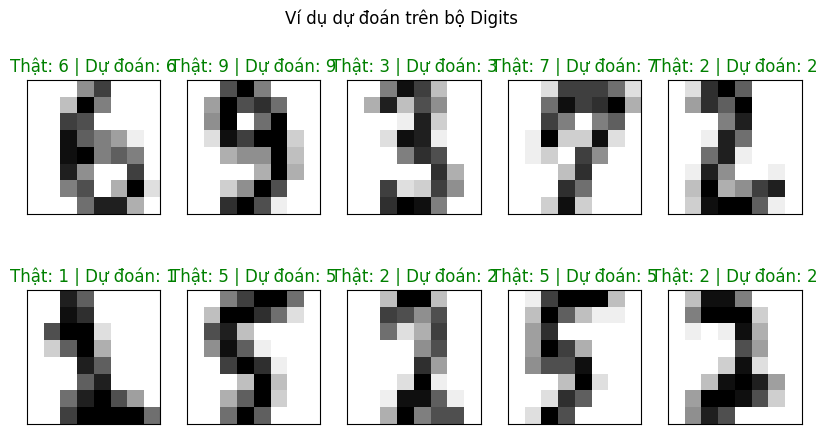

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

def svm_example_2_nonlinear_digits():
    print("--- Ví dụ 2: SVM Phân loại Phi tuyến (Kernel RBF) trên bộ Digits ---")

    # 1. Tải dữ liệu
    digits = load_digits()
    X = digits.data # 1797 ảnh, mỗi ảnh 64 pixel (8x8)
    y = digits.target # Nhãn từ 0 đến 9

    # 2. Chia dữ liệu
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # 3. Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 4. Xây dựng mô hình SVM với kernel='rbf' (Radial Basis Function)
    # Đây là kernel mặc định và rất mạnh
    svm_rbf = SVC(kernel='rbf', gamma='scale', C=1.0, random_state=42)
    svm_rbf.fit(X_train_scaled, y_train)

    # 5. Dự đoán và đánh giá
    y_pred = svm_rbf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"==> Độ chính xác (Accuracy): {accuracy * 100:.2f}%")
    print("\nBáo cáo chi tiết (Classification Report):")
    print(classification_report(y_test, y_pred))

    # 6. Trực quan hóa một vài dự đoán
    fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                             subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(X_test[i].reshape(8, 8), cmap='binary')
        ax.set_title(f"Thật: {y_test[i]} | Dự đoán: {y_pred[i]}",
                     color='green' if y_test[i] == y_pred[i] else 'red')
    plt.suptitle("Ví dụ dự đoán trên bộ Digits")
    plt.show()

# Gọi hàm để chạy
svm_example_2_nonlinear_digits()